# This notebook investiages the color-color space of the calibration sample and the full main sequence of some SMASH fields

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde
import matplotlib.colors as clr
from io import StringIO 
from astropy.io import ascii
import math
import random
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
import scipy
from scipy.stats import kde
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path

In [182]:
data = '/Users/amyel/research/SMASH_project/datafiles/new_SMASH_SDSS_LAMOST_crossmatch.fits'
fx = fitsio.FITS(data)
objs = fx[1].read()
#deredden calibration sample
u_cal = (objs["U"]-(4.239*objs["EBV"]))
g_cal = (objs["G"]-(3.303*objs["EBV"]))
i_cal = (objs["I"]-(1.263*objs["EBV"]))
r_cal = (objs["R"]-(2.285*objs["EBV"]))
feh_cal = objs["FEH"]
select = np.where(i_cal<=30)
u_g_cal = u_cal - g_cal
g_r_cal = g_cal - r_cal

In [195]:
len(i_cal[select])

2720

## Below, CMD of calibration sample (stars with SMASH spectroscopy and LAMOST/SDSS spectra) after giants are cut. 

(27, 13)

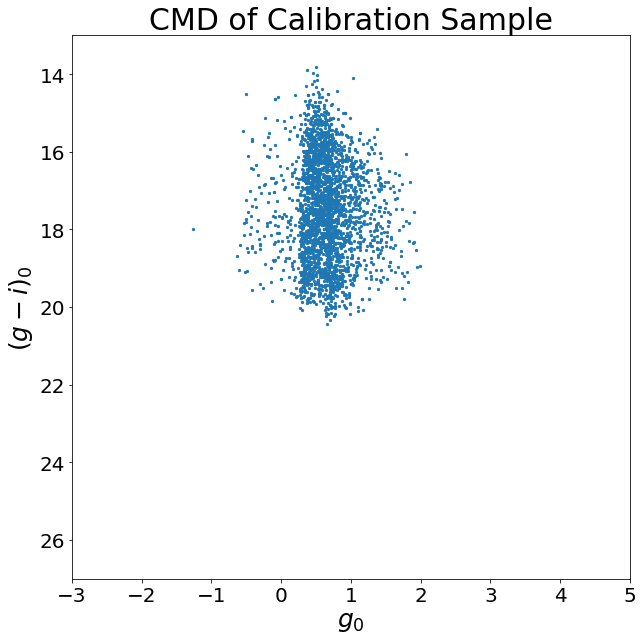

In [198]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(g_cal[select]-i_cal[select],g_cal[select],s=5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('CMD of Calibration Sample',fontsize=30)
ax.set_xlabel('$g_0$',fontsize=25)
ax.set_ylabel('$(g-i)_0$',fontsize=25)
ax.set_xlim(-3,5)
ax.set_ylim(27,13)



In [205]:
def select_MS(field,m,yx):
    filename = '/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field'+str(field)+'_allobj_deep_stars.fits.gz'
    fx = fitsio.FITS(filename)
    objs= fx[1].read()
    u = (objs["U"]-(4.239*objs["EBV"]))
    g = (objs["G"]-(3.303*objs["EBV"]))
    i = (objs["I"]-(1.263*objs["EBV"]))
    r = (objs["R"]-(2.285*objs["EBV"]))
    selected = np.where((u<=26)&(r<=26)&(g<=26)&(g>=14)&(r>=14)&(u>=14)&(i<=26)&(i>=14)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
    u,g,r,i=u[selected],g[selected],r[selected],i[selected]
    u_g = u-g
    g_r = g-r
    g_i = g-i
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(g_i,g,s=0.001)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title('Field '+str(field)+'',fontsize=30)
    ax.set_ylabel('$g_0$',fontsize=25)
    ax.set_xlabel('$(g-i)_0$',fontsize=25)
    ax.set_xlim(-2,4)
    ax.set_ylim(26.5,13.5)
    plt.show(block=False)
    #for straight line on plot
    x_line = np.arange(-4,6,.01)
    y_line = m*x_line + yx
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(g-i,g,s=0.001)
    ax.plot(x_line,y_line,c='r')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title('Field '+str(field)+'',fontsize=30)
    ax.set_ylabel('$g_0$',fontsize=25)
    ax.set_xlabel('$(g-i)_0$',fontsize=25)
    ax.set_xlim(-2,4)
    ax.set_ylim(26.5,13.5)
    plt.show(block=False)
        
    selected=np.where((g>((m)*g_i+yx)))
    u,g,r,i=u[selected],g[selected],r[selected],i[selected]
    u_g = u-g
    g_r = g-r
    g_i = g-i
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(g_i,g,s=0.001)
    ax.set_title('Field '+str(field)+'',fontsize=30)
    ax.set_ylabel('$g_0$',fontsize=25)
    ax.set_xlabel('$(g-i)_0$',fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim(-2,4)
    ax.set_ylim(26.5,13.5)
    
    return u_g,g_r

In [220]:

data = '/Users/amyel/research/SMASH_project/datafiles/parsec_decamsdss_3.0gyr.fits.gz'
fx = fitsio.FITS(data)
objs = fx[1].read()

In [238]:
u_des = objs['DECAM_U']
g_des = objs['DES_G']
r_des = objs['DES_R']
i_des = objs['DES_I']
z_des = objs['DES_Z']
feh_des = objs['FEH']
u_g_des = u_des - g_des
g_r_des = g_des - r_des
u_g_des = u_g_des + .3
#apply shift found in isochrone_minimize_residuals_01OCT2019
u_g_des = u_g_des - .005
g_r_des = g_r_des - .005
#reduce area to around selection box
selected = np.where((g_r_des<=1.2))
u_g_des = u_g_des[selected]
g_r_des = g_r_des[selected]
feh_des = feh_des[selected]
i_des,g_des = i_des[selected],g_des[selected]


In [304]:
#fig, ax = plt.subplots(figsize=(10,10))
#ax.scatter(g_des-i_des,g_des,s=0.1)
#ax.tick_params(axis='both', which='major', labelsize=20)

#ax.set_ylabel('$g_{DECam}$',fontsize=25)
#ax.set_xlabel('$(g-i)_{DECam}$',fontsize=25)
#ax.set_ylim(15,-5)

In [308]:
def contour(u_g,g_r,bins,length,levels):
    hess = stats.binned_statistic_2d(u_g,g_r,None,'count',bins=bins)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='jet')
    cb = fig.colorbar(im,ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title('Raw Binned Image',fontsize=25)
    ax.set_ylabel('$(u-g)_0$',fontsize=25)
    ax.set_xlabel('$(g-r)_0$',fontsize=25)
    ticklabs = cb.ax.get_yticks()
    cb.ax.set_yticklabels(ticklabs, fontsize=15)
    cb.ax.set_title('Stellar \n Density',fontsize=15)
    plt.show(block=False)
    
    result = gaussian_filter((hess.statistic),sigma=3)


    
    xx,yy = np.mgrid[hess.x_edge.min():hess.x_edge.max():length, hess.y_edge.min():hess.y_edge.max():length]

    #levels = [(np.mean(result)+(index*np.std(result))) for index in np.arange(1,11,1)]
    levels = levels
    fig, ax = plt.subplots(figsize=(10,10))
    
    rcs = ax.contour(xx,yy,result,levels=levels,cmap='gray')
    
    im = ax.pcolormesh(hess.x_edge,hess.y_edge,result.T,cmap='jet')
    cb = fig.colorbar(im,ax=ax)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('$(u-g)_0$',fontsize=25)
    ax.set_xlabel('$(g-r)_0$',fontsize=25)
    ticklabs = cb.ax.get_yticks()
    cb.ax.set_yticklabels(ticklabs, fontsize=15)
    cb.ax.set_title('Stellar \n Density',fontsize=15)
    
    
    return xx,yy,result,levels

In [309]:
xx={}
yy={}
result={}
levels={}

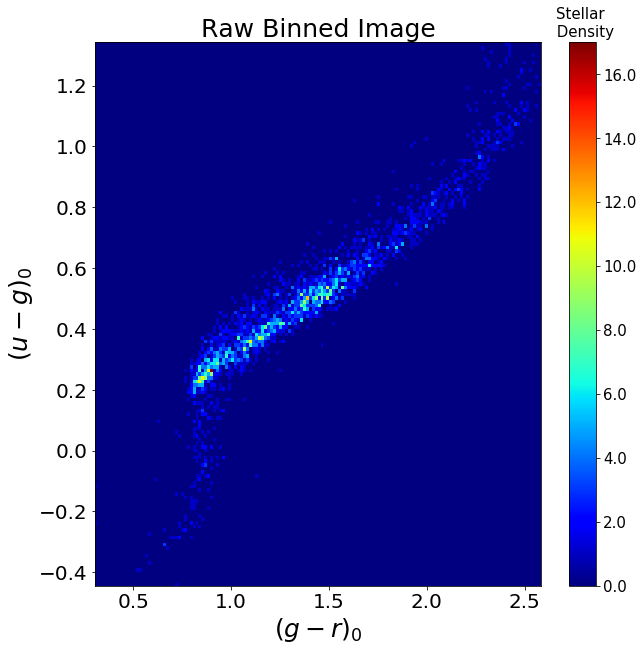

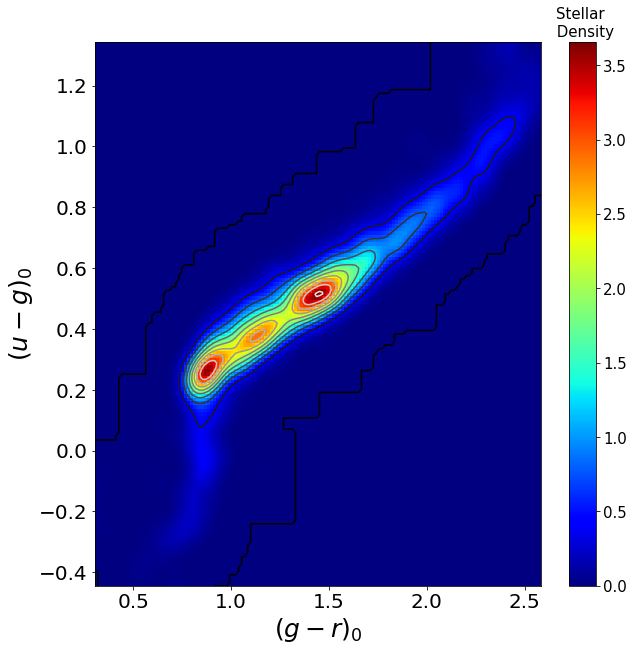

In [310]:
xx['cal'],yy['cal'],result['cal'],levels['cal'] = contour(u_g_cal,g_r_cal,150,150j,10)

In [315]:
def field_contour_cal(xx,yy,result,levels,field,u_g,g_r,bins):
    hess_field = stats.binned_statistic_2d(u_g,g_r,None,'count',bins=bins)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.pcolormesh(hess_field.x_edge,hess_field.y_edge,hess_field.statistic.T,cmap='inferno')
    cb = fig.colorbar(im,ax=ax)
    ax.contour(xx,yy,result,levels=levels,cmap='Blues')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title('Field '+str(field)+' MS Density w/ Cal. Contours',fontsize=25)
    ax.set_ylabel('$(u-g)_0$',fontsize=20)
    ax.set_xlabel('$(g-r)_0$',fontsize=20)
    ax.set_xlim(0.1,3)
    ax.set_ylim(-0.5,1,5)
    ticklabs = cb.ax.get_yticks()
    cb.ax.set_yticklabels(ticklabs, fontsize=15)
    cb.ax.set_title('Stellar \n Density',fontsize=15)
    
    return 0

In [260]:
u_g = {}
g_r = {}

# Below, CMD of SMASH field, red line showing how I selected main sequence stars, main sequence stars selected, and then a stellar density plot

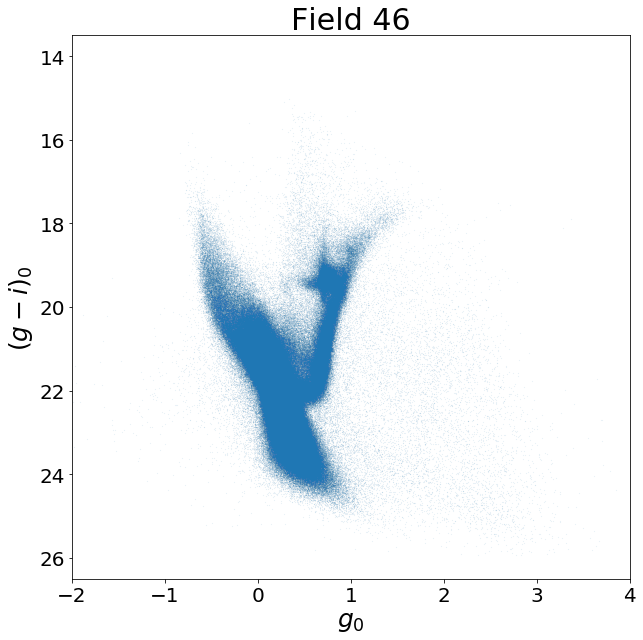

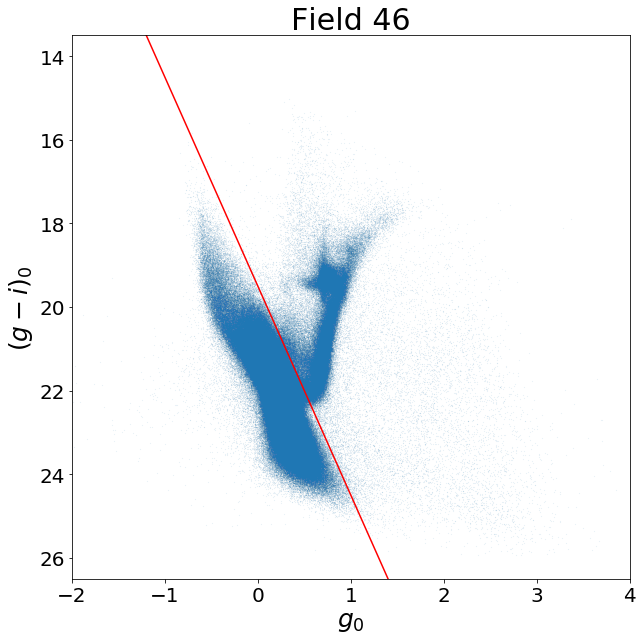

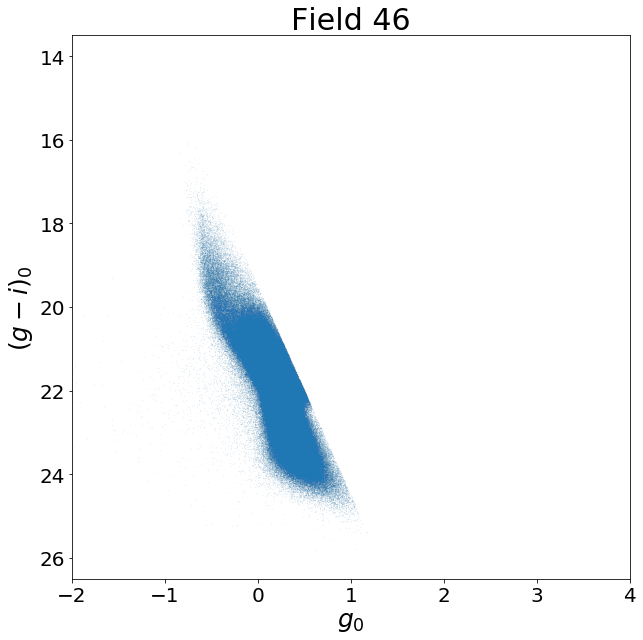

In [313]:
u_g['46'],g_r['46'] = select_MS(46,5,19.5)

0

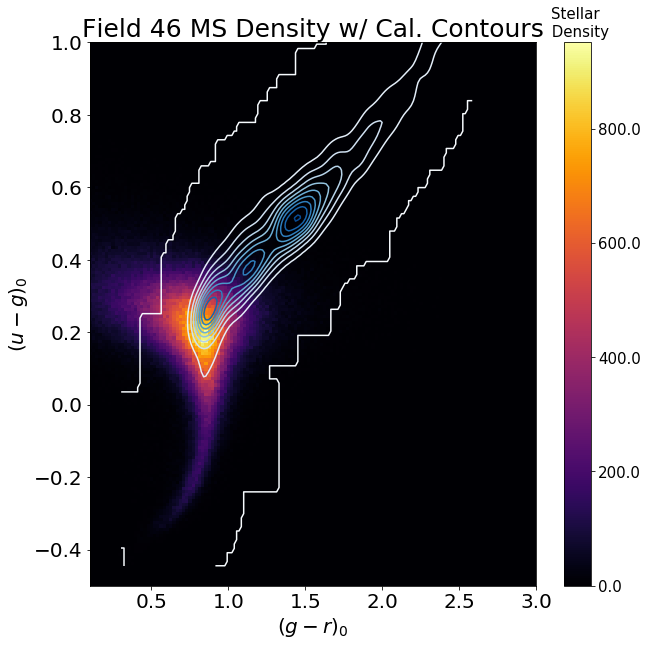

In [316]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],46,u_g['46'],g_r['46'],bins=500)

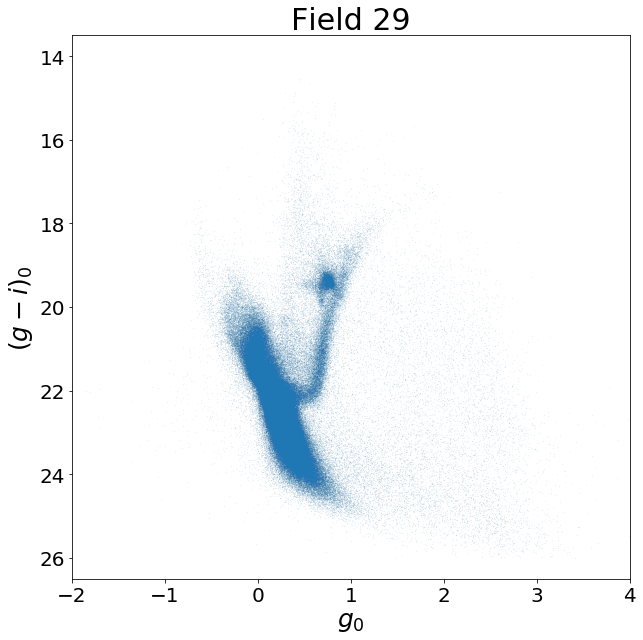

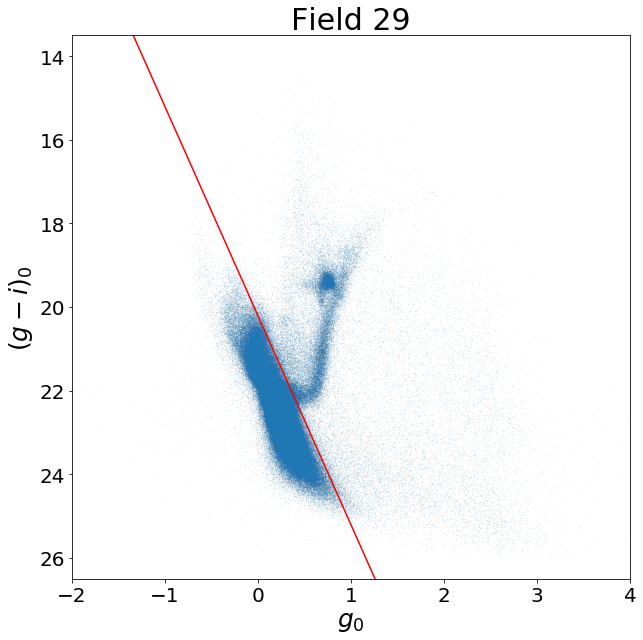

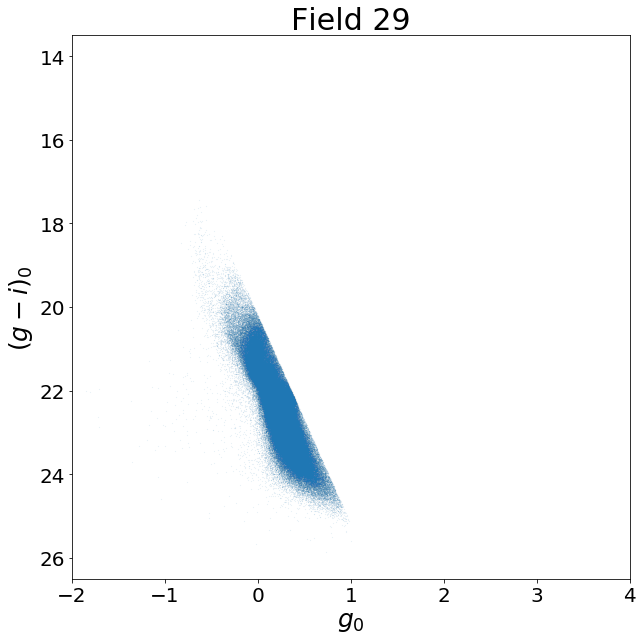

In [266]:
u_g['29'],g_r['29'] = select_MS(29,5,20.2)

0

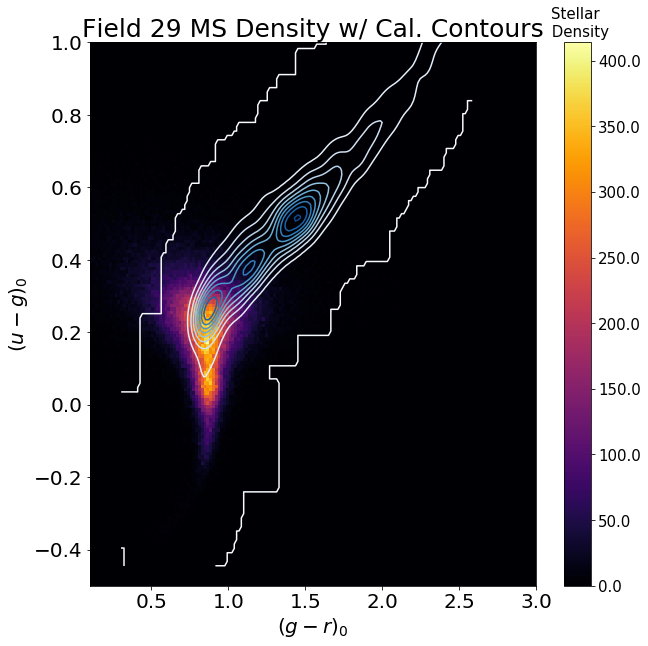

In [317]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],29,u_g['29'],g_r['29'],bins=500)

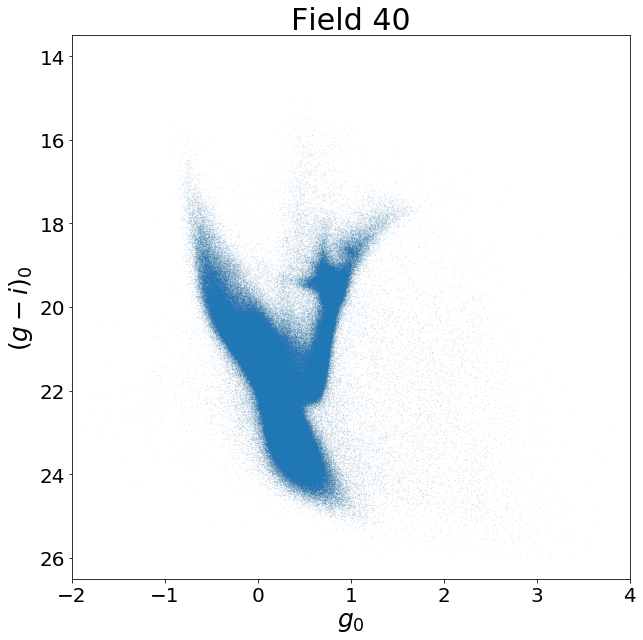

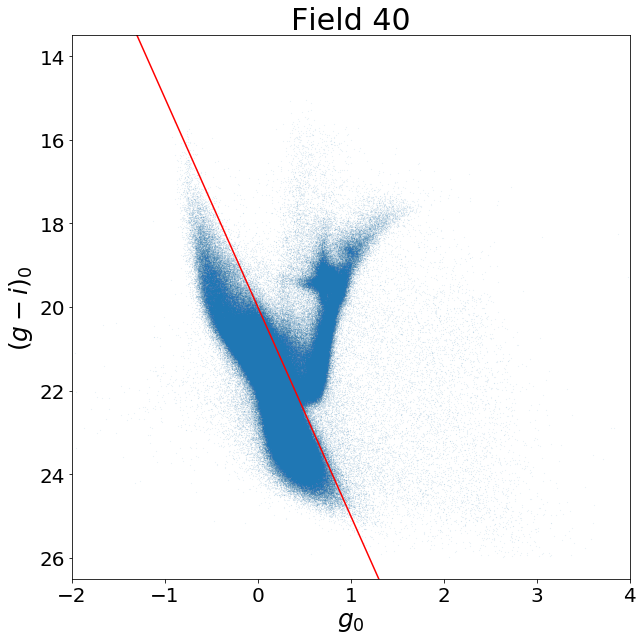

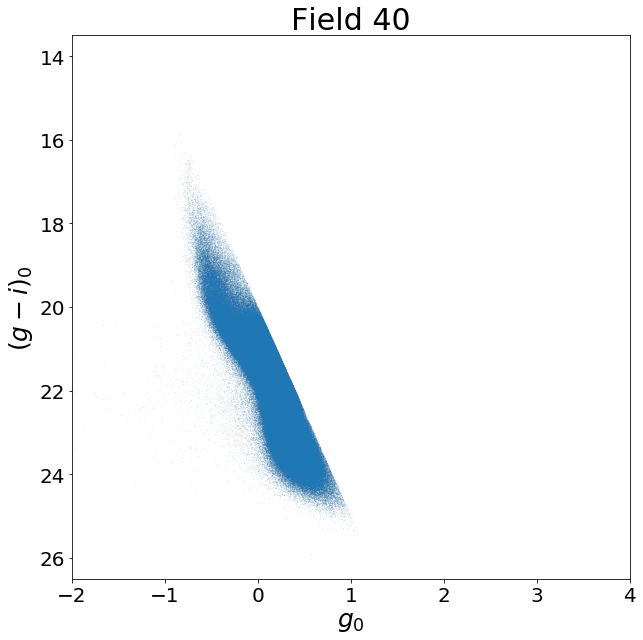

In [269]:
u_g['40'],g_r['40'] = select_MS(40,5,20)

0

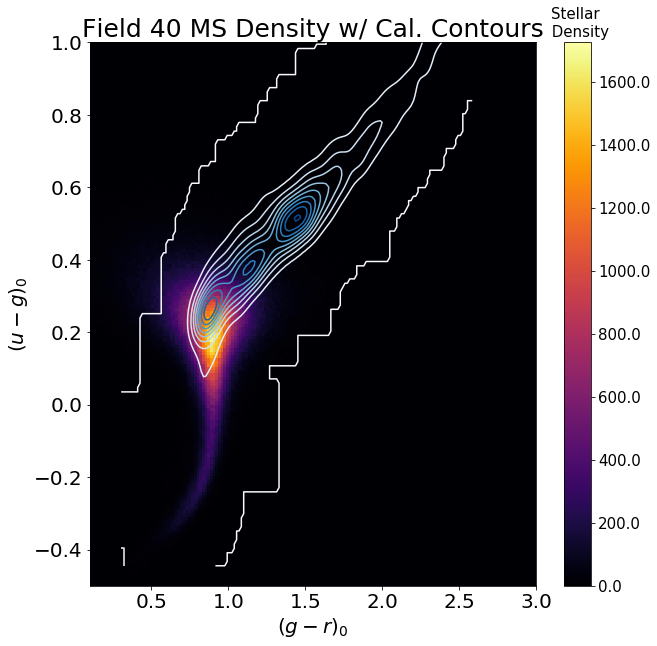

In [318]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],40,u_g['40'],g_r['40'],bins=500)



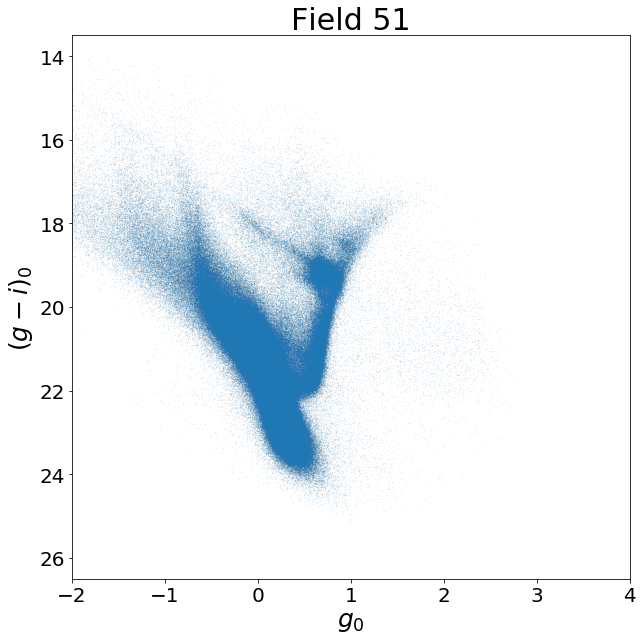

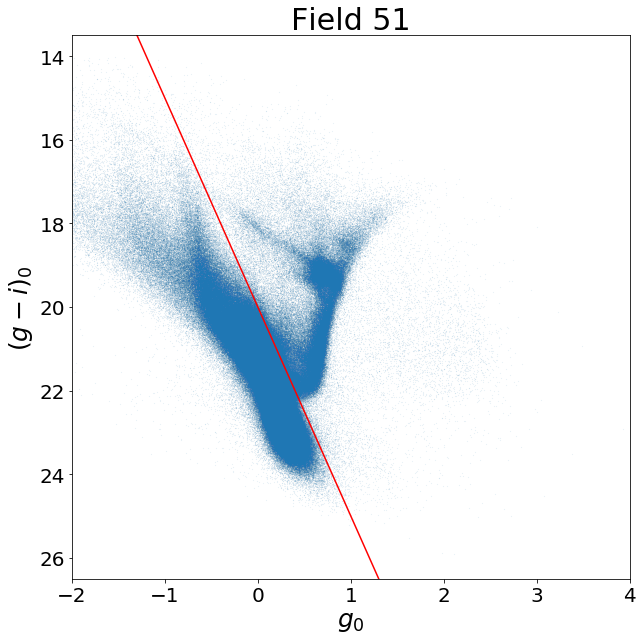

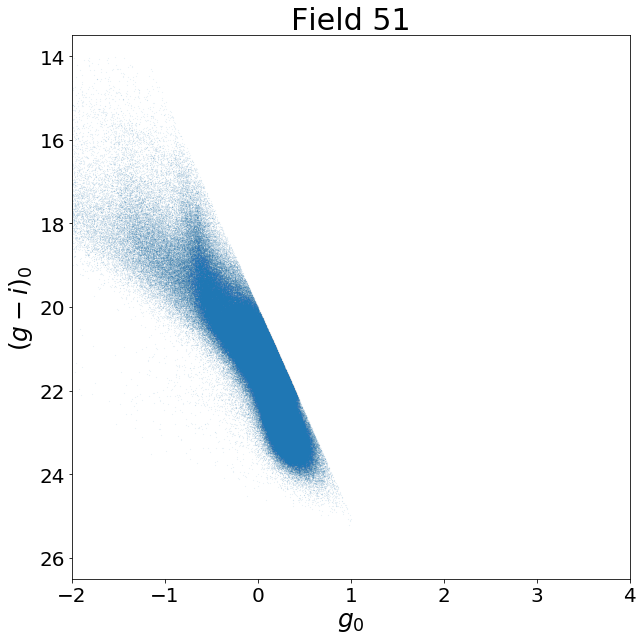

In [271]:
u_g['51'],g_r['51'] = select_MS(51,5,20)

0

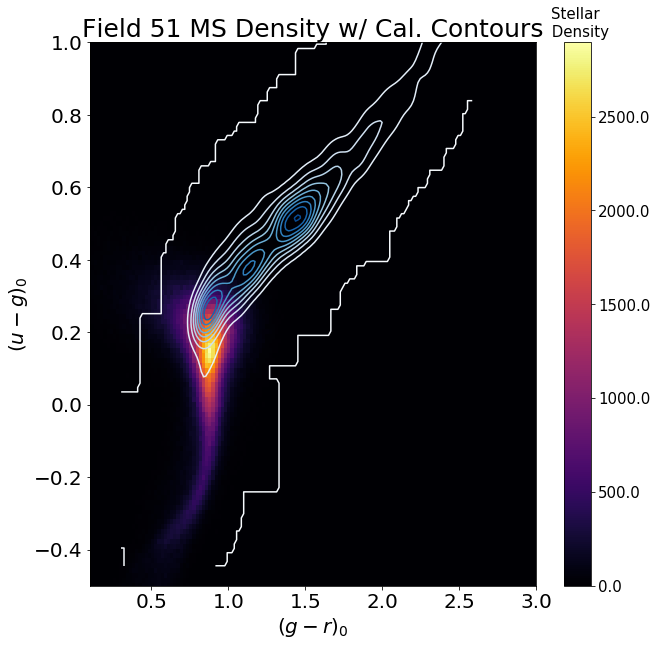

In [319]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],51,u_g['51'],g_r['51'],bins=500)



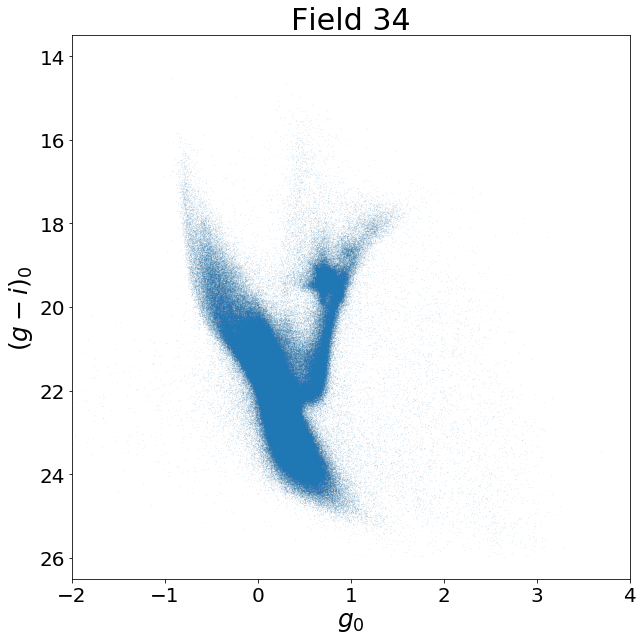

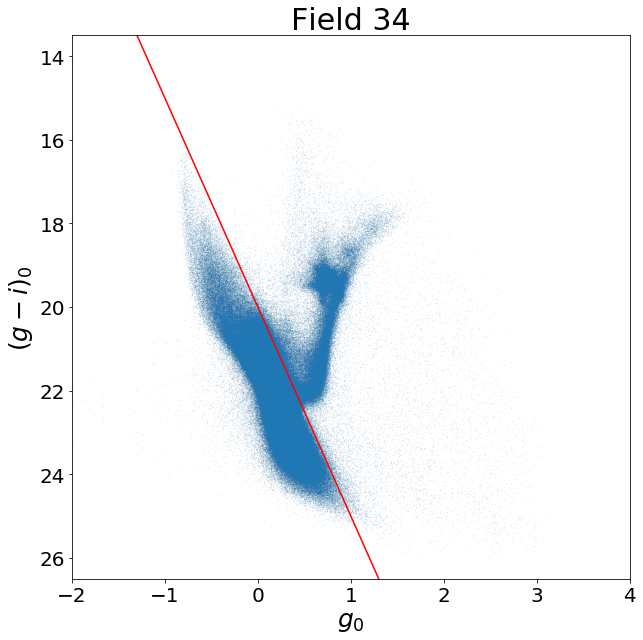

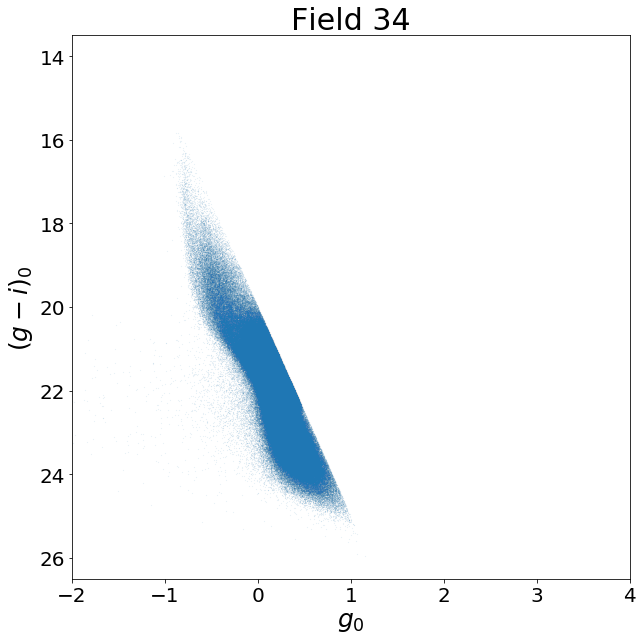

In [273]:
u_g['34'],g_r['34'] = select_MS(34,5,20)

0

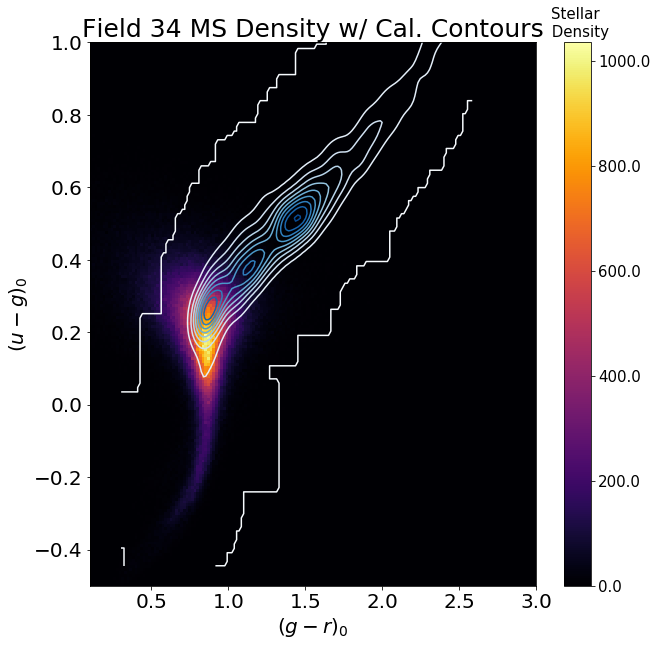

In [320]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],34,u_g['34'],g_r['34'],bins=500)


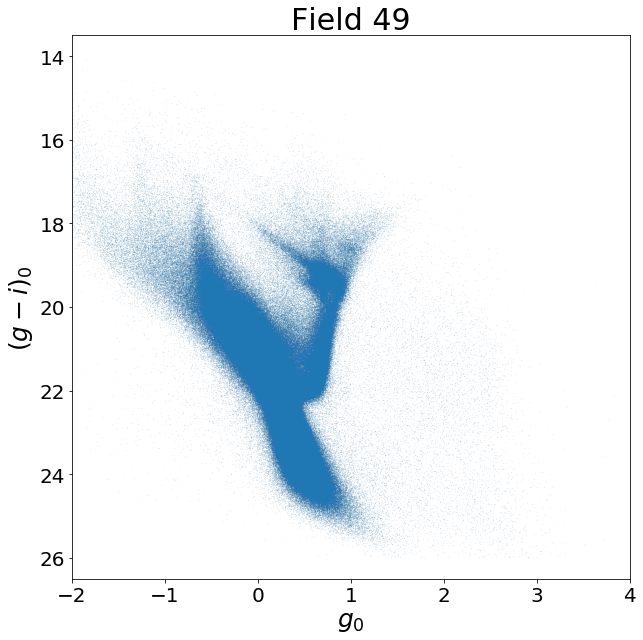

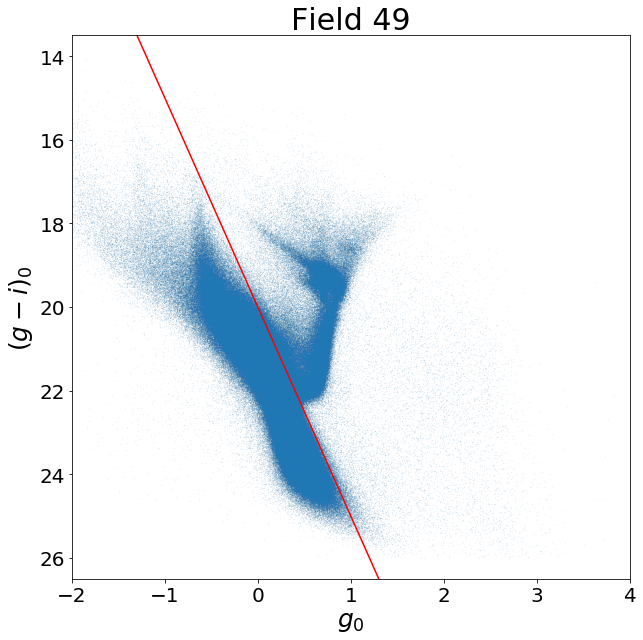

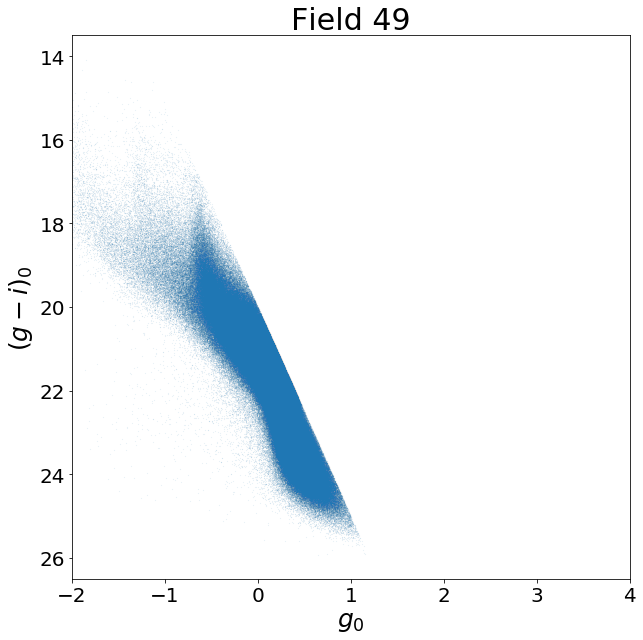

In [275]:
u_g['49'],g_r['49'] = select_MS(49,5,20)

0

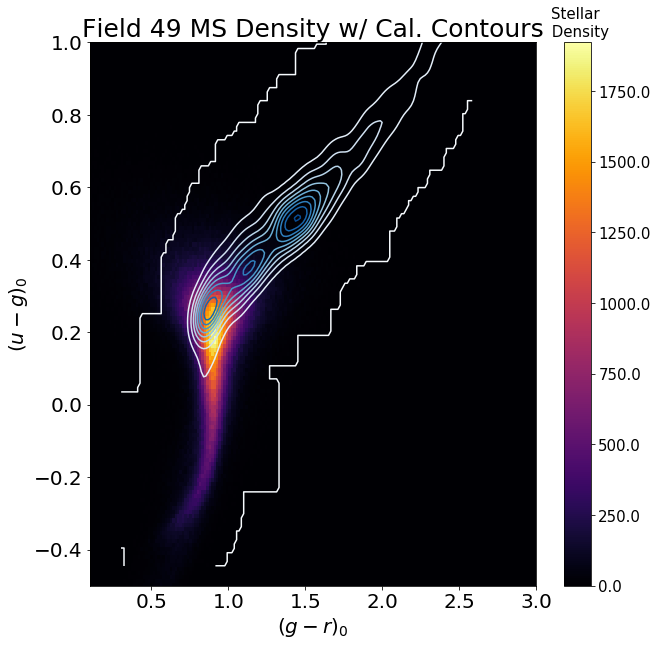

In [321]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],49,u_g['49'],g_r['49'],bins=500)


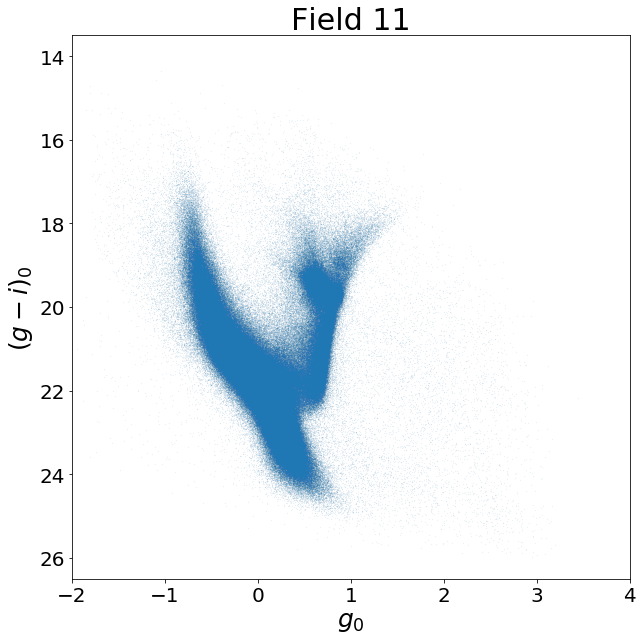

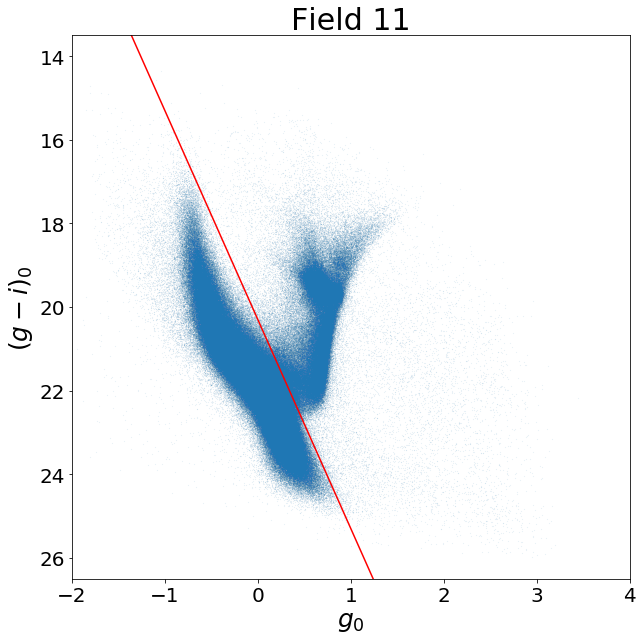

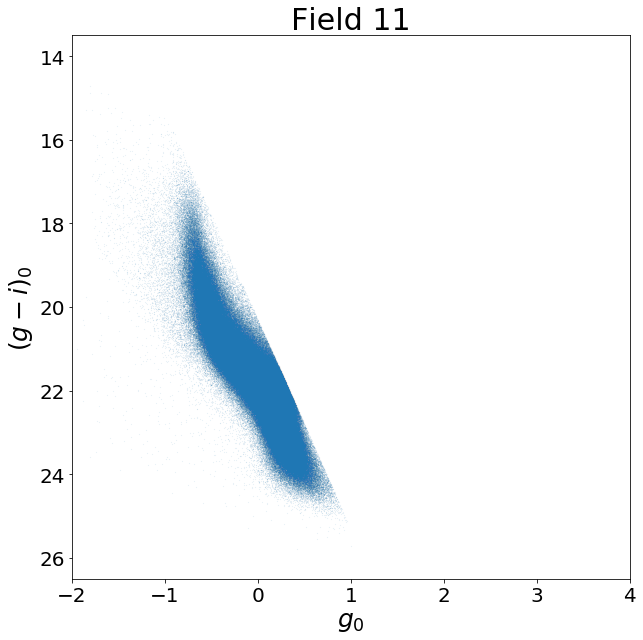

In [278]:
u_g['11'],g_r['11'] = select_MS(11,5,20.3)

0

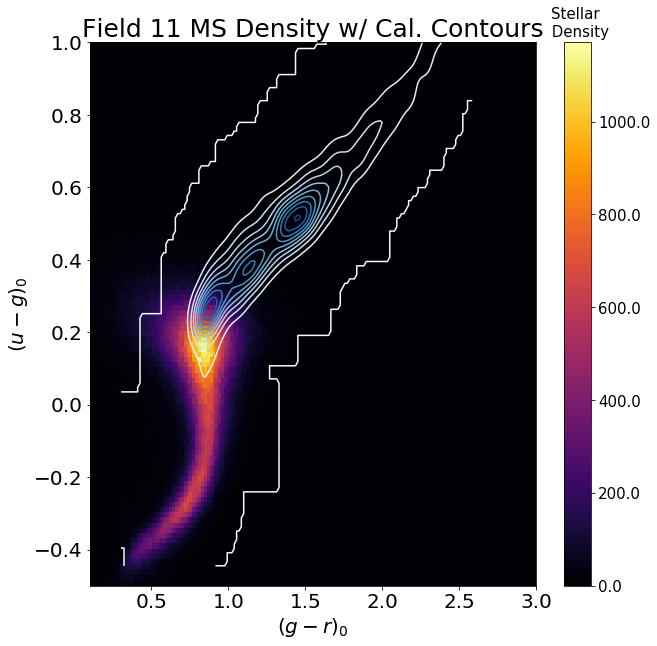

In [322]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],11,u_g['11'],g_r['11'],bins=500)


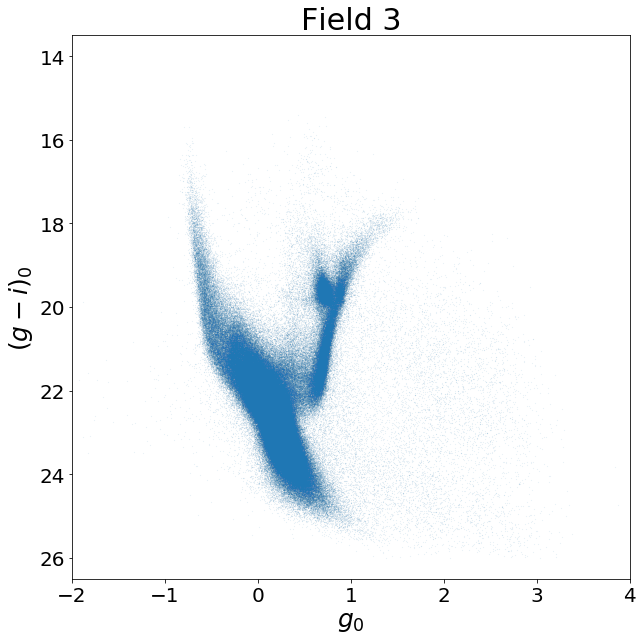

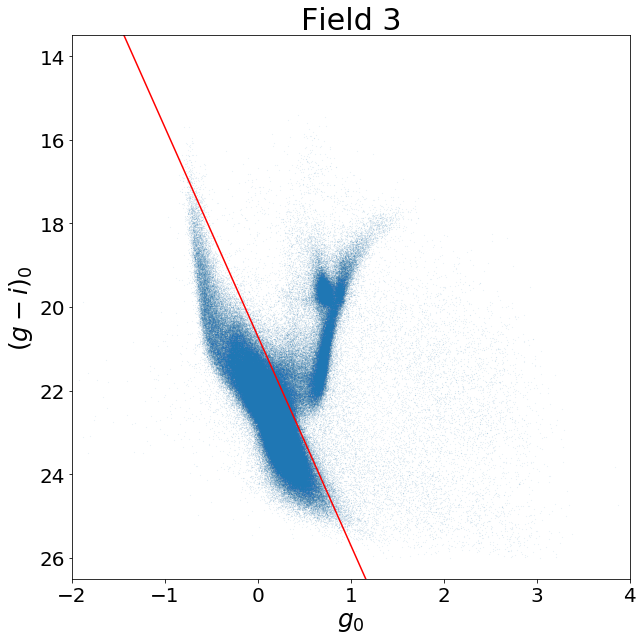

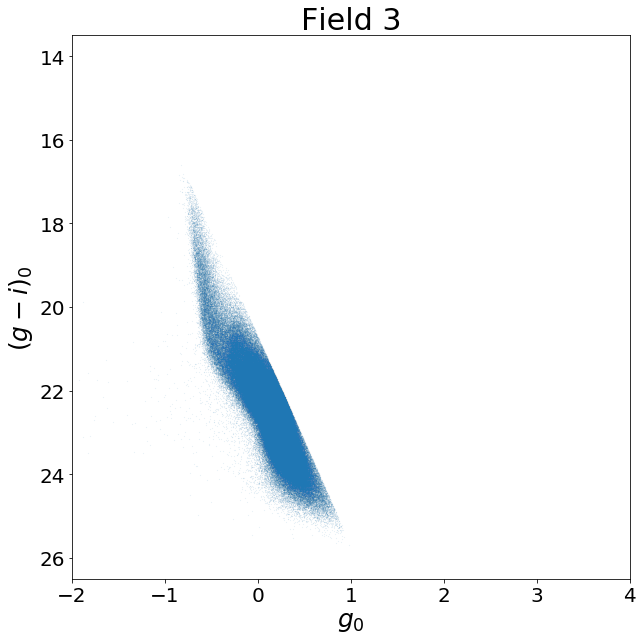

In [281]:
u_g['3'],g_r['3'] = select_MS(3,5,20.7)

0

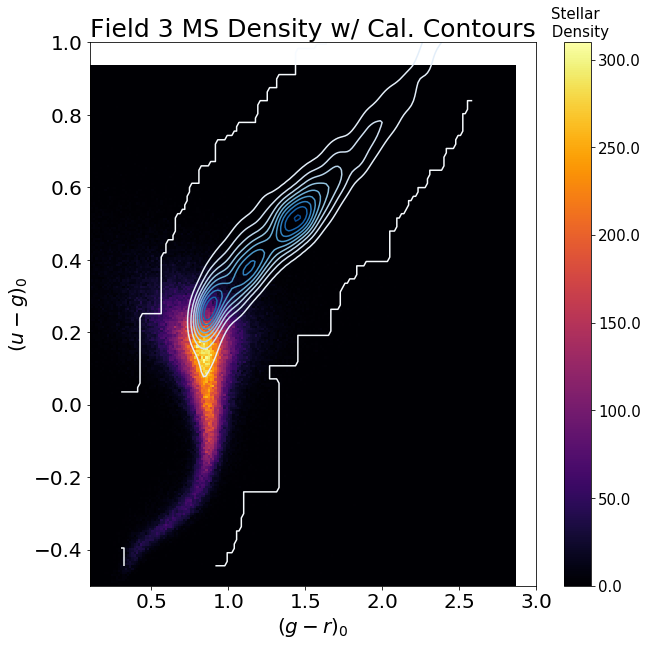

In [323]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],3,u_g['3'],g_r['3'],bins=500)


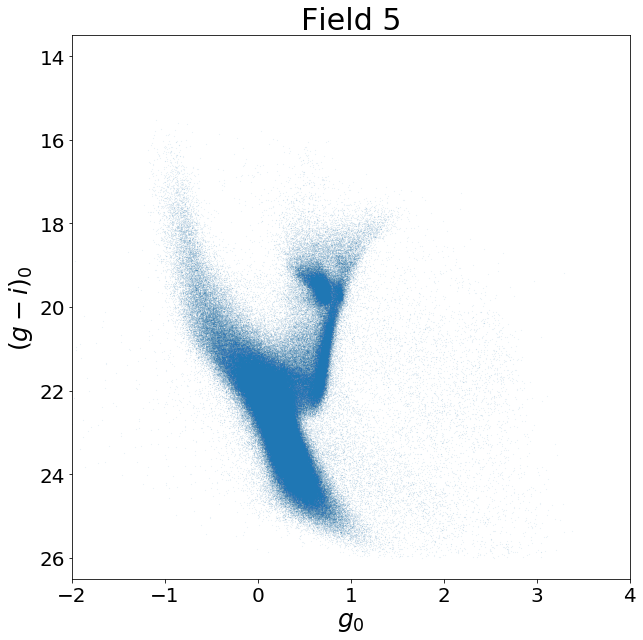

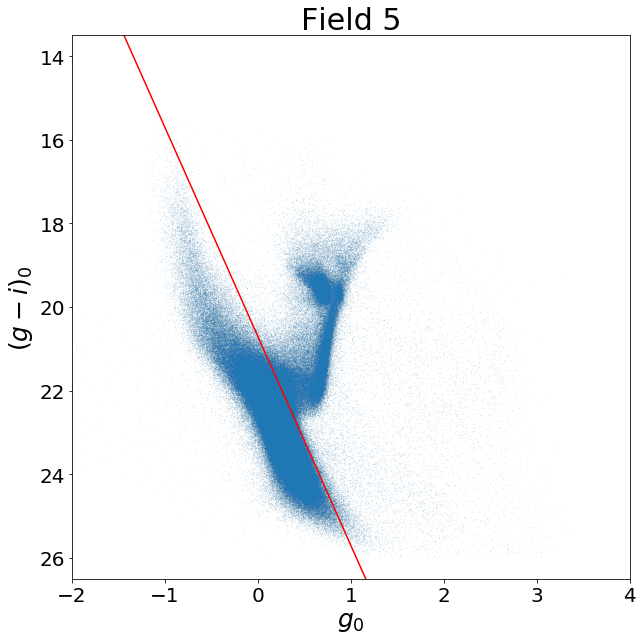

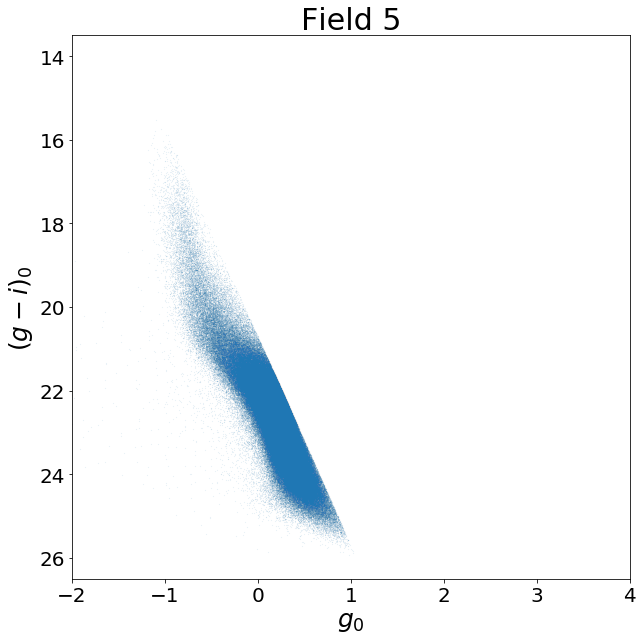

In [283]:
u_g['5'],g_r['5'] = select_MS(5,5,20.7)

0

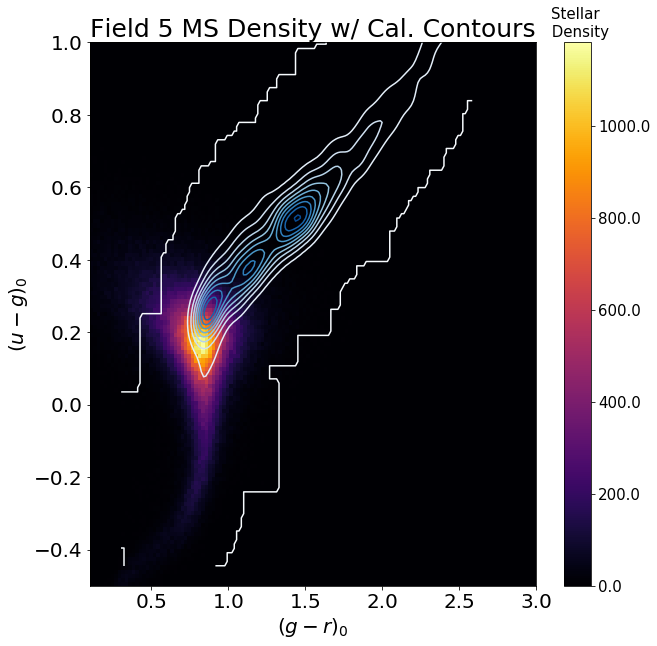

In [324]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],5,u_g['5'],g_r['5'],bins=500)


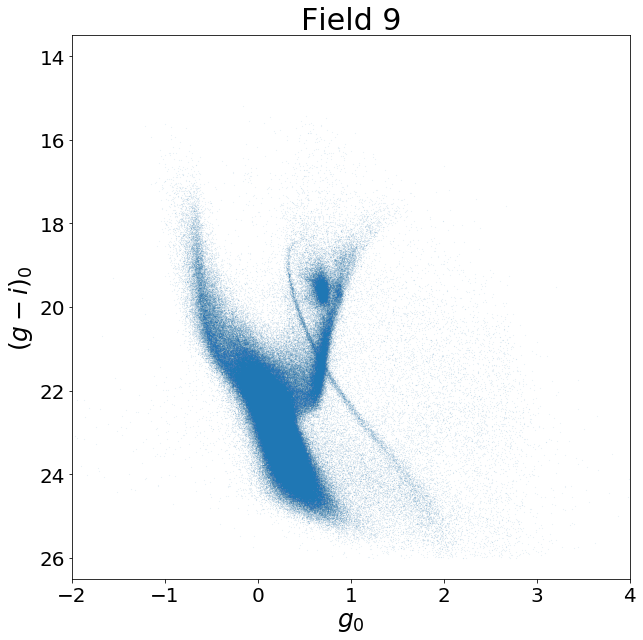

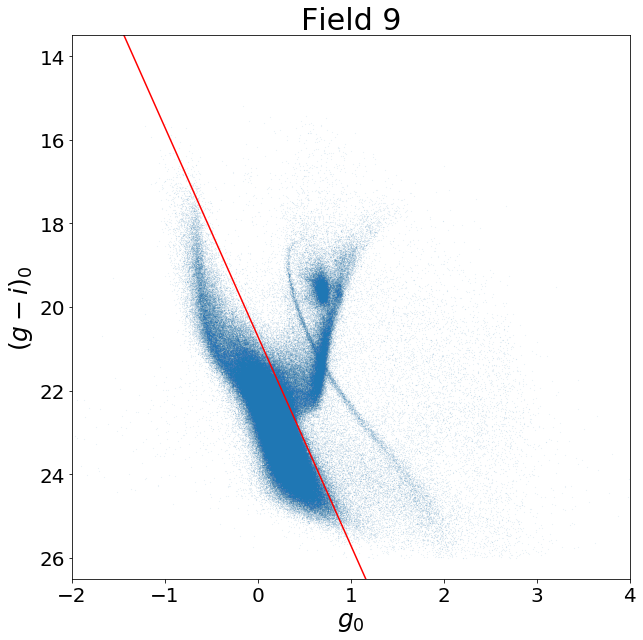

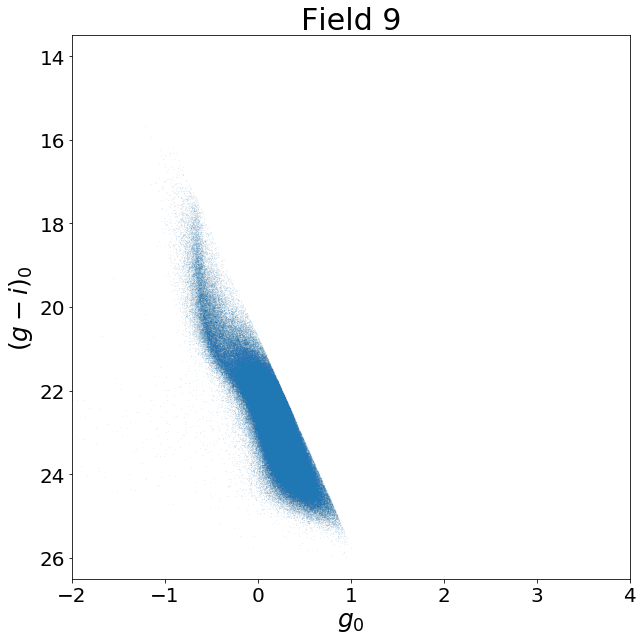

In [285]:
u_g['9'],g_r['9'] = select_MS(9,5,20.7)

0

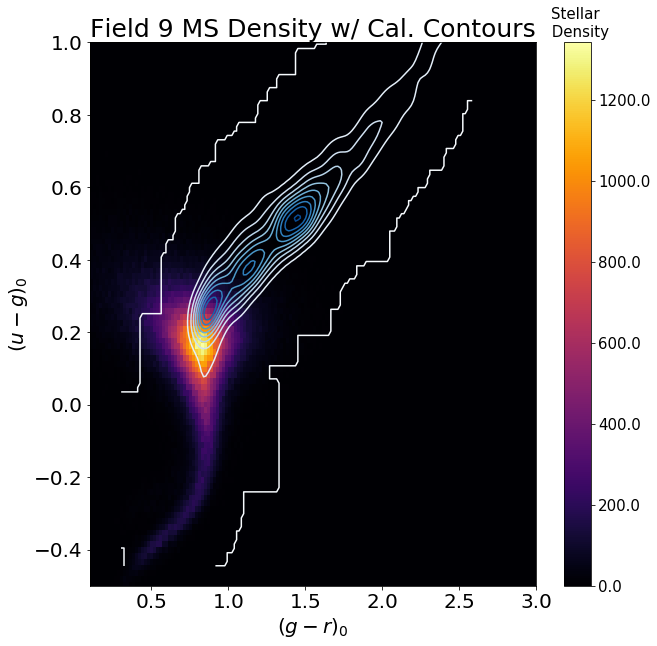

In [325]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],9,u_g['9'],g_r['9'],bins=500)


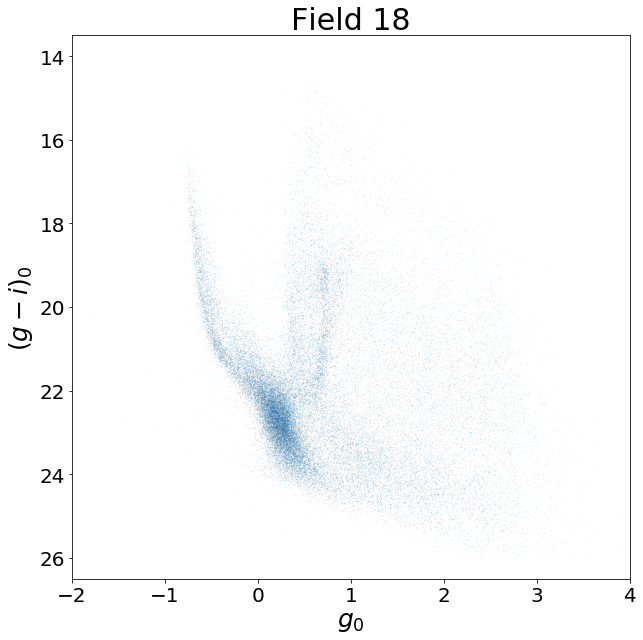

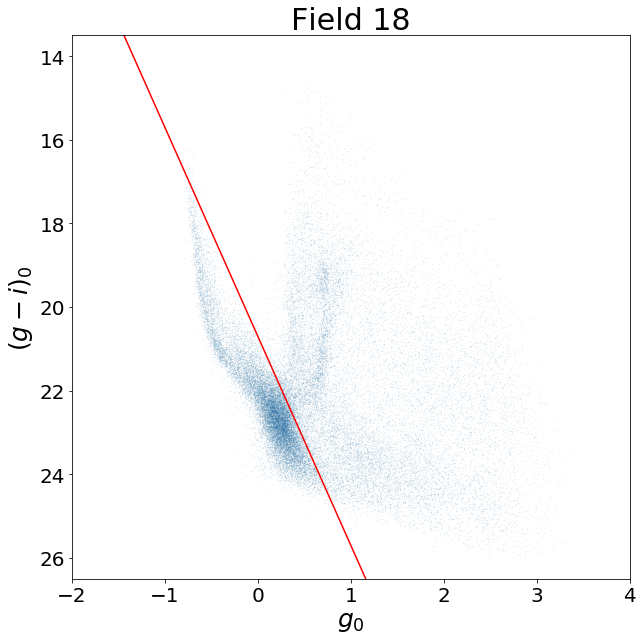

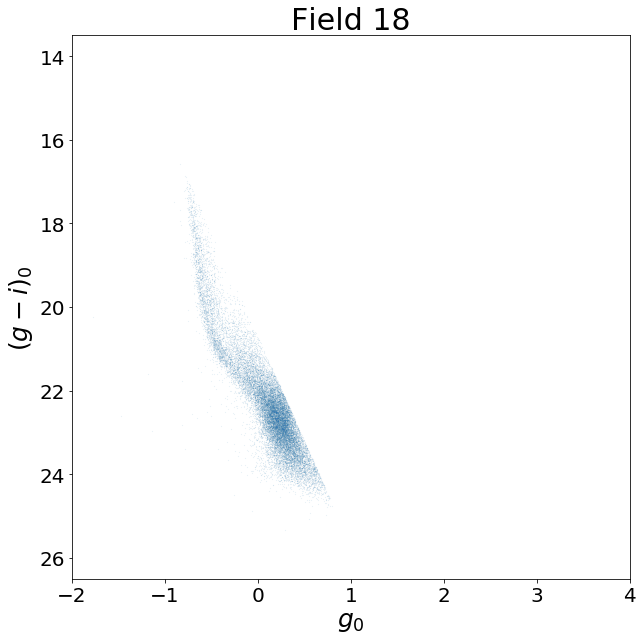

In [287]:
u_g['18'],g_r['18'] = select_MS(18,5,20.7)

0

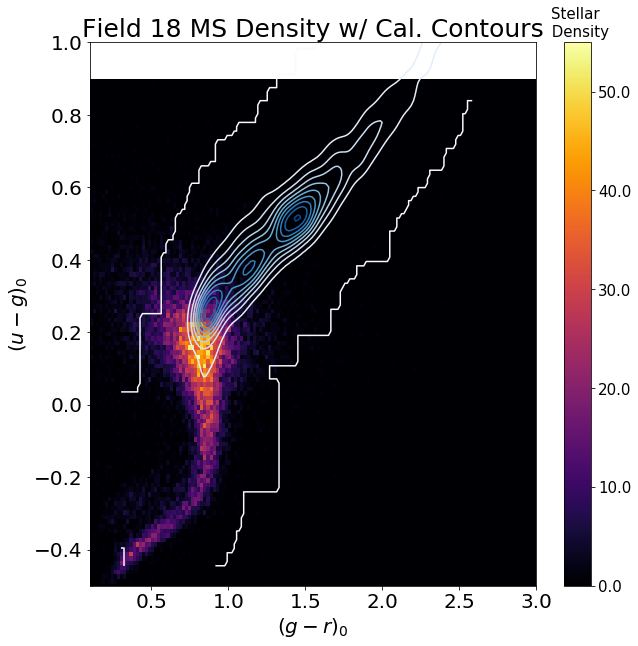

In [326]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],18,u_g['18'],g_r['18'],bins=500)


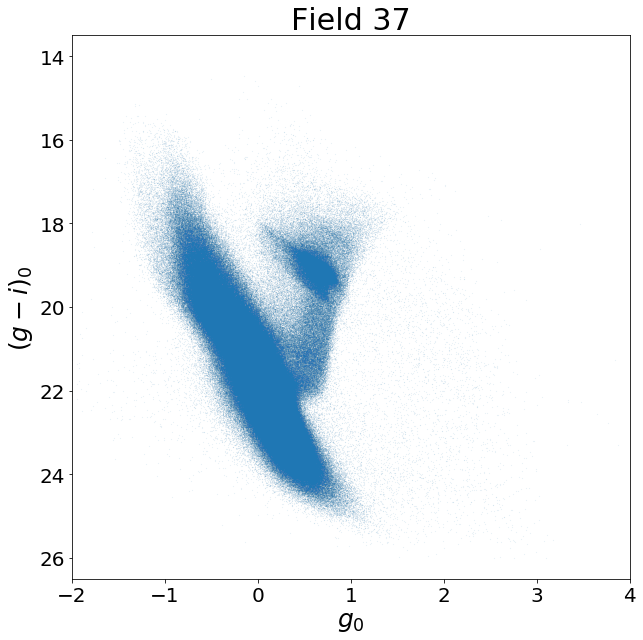

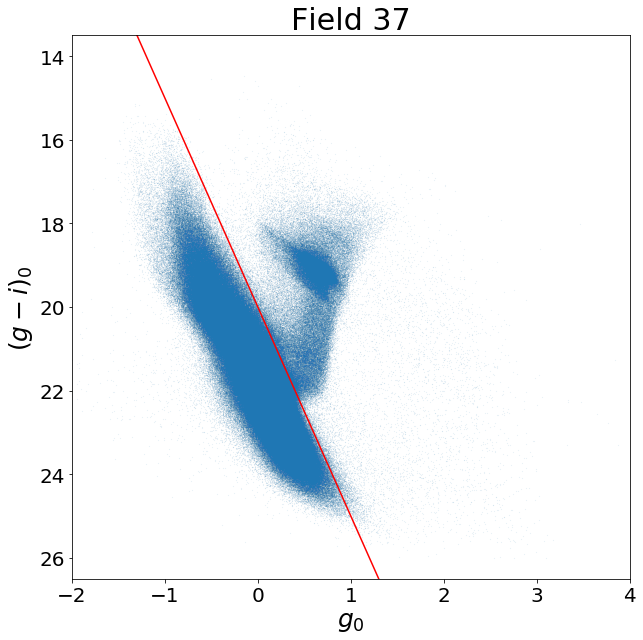

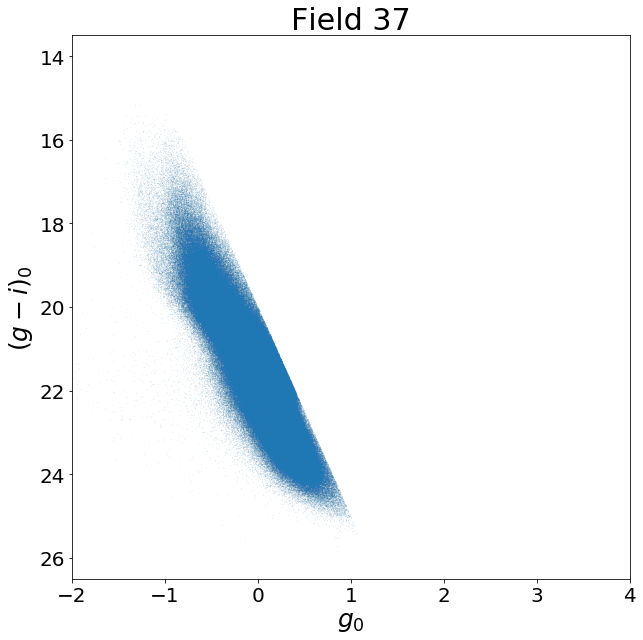

In [297]:
u_g['37'],g_r['37'] = select_MS(37,5,20)

0

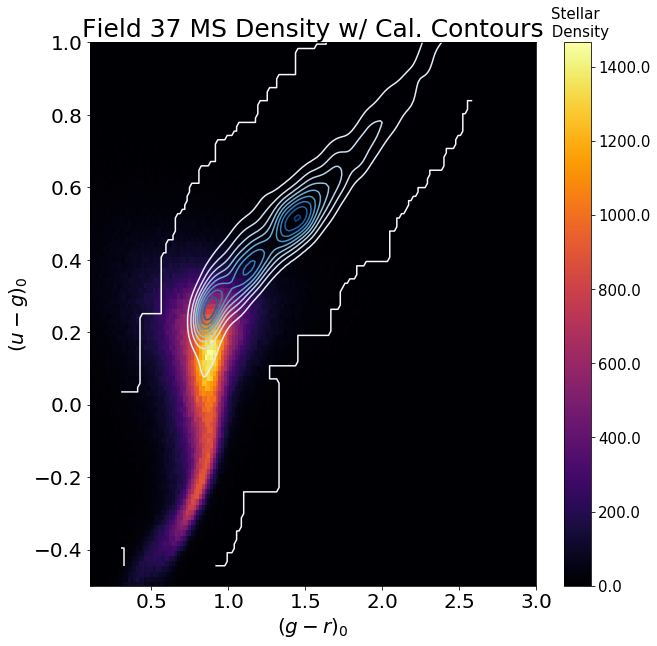

In [327]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],37,u_g['37'],g_r['37'],bins=500)


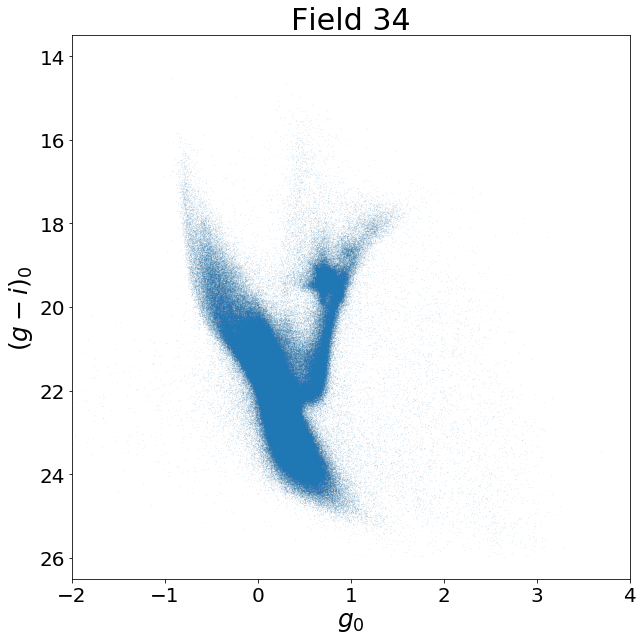

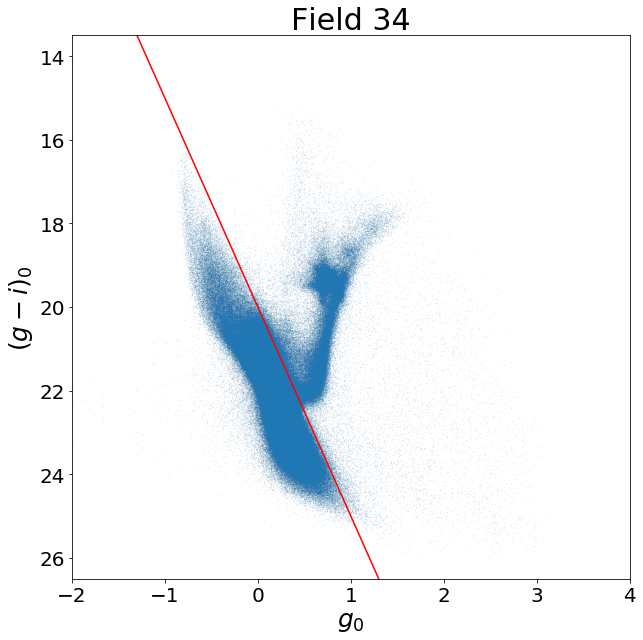

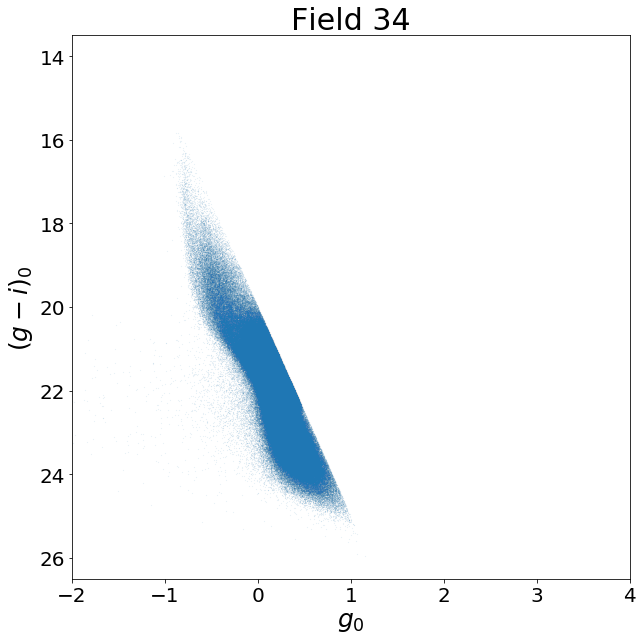

In [299]:
u_g['34'],g_r['34'] = select_MS(34,5,20)

0

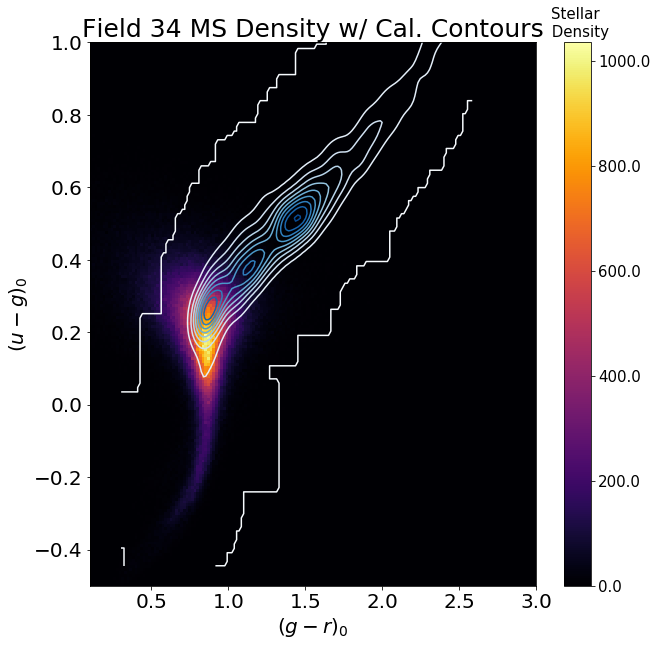

In [328]:
field_contour_cal(xx['cal'],yy['cal'],result['cal'],levels['cal'],34,u_g['34'],g_r['34'],bins=500)


In [ ]:
fields = [46,29,40,51,34,49,11,3,5,9,18,37,34]